In [193]:
import pandas as pd
import re
import os
import numpy as np
import glob
from datetime import datetime
import geopandas as gpd
import json
from shapely.geometry import shape, GeometryCollection
from rasterio.plot import show
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

import shutil
import rasterio

%matplotlib inline

In [194]:
json_folder = r"C:\Users\yc463\Documents\JamesLocal\DS\Drone\GEOJSONDATA\GeoJson"
img_folder = r'C:\Users\yc463\Documents\JamesLocal\DS\Drone\GEOJSONDATA\Naver'
tiff_folder = r'C:\Users\yc463\Documents\JamesLocal\DS\Drone\GEOJSONDATA\GeoTiff'

In [195]:
files = glob.glob(os.path.join(tiff_folder,'*.tif'))
files

['C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\중문골프클럽L14.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\중문골프클럽L15.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\중문골프클럽L18.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\클럽디거창CCL14.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\클럽디거창CCL15.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\클럽디거창CCL18.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\클럽디속리산CCL14.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\클럽디속리산CCL15.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\클럽디속리산CCL18.tif']

In [196]:
target_courseName = '속리산'

In [197]:
out_tiff = [ x for x in files if 'L18' in x and target_courseName in x][0]

#### 이미지를 읽어온다 Raterio활용. crs를 5179로

In [198]:
import rasterio
import cv2

with rasterio.open(out_tiff, mode='r+') as dataset:
  image_org = dataset.read()
  image_org = image_org.transpose(1, 2, 0) # RGB

In [199]:
dataset.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

### Color Quantization with OpenCV

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Convert RGB to BGR
image_bgr = cv2.cvtColor(image_org, cv2.COLOR_RGB2BGR)
(h, w) = image_bgr.shape[:2]
# convert the image from the RGB color space to the L*a*b*
# color space -- since we will be clustering using k-means
# which is based on the euclidean distance, we'll use the
# L*a*b* color space where the euclidean distance implies
# perceptual meaning
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)
# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))
# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 5)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]
# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

In [200]:
image_bgr = cv2.cvtColor(image_org, cv2.COLOR_RGB2BGR)
hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

In [201]:
# mask = cv2.inRange(hsv, (101,  70, 160), (110,  90, 255))
# # (hMin = 101 , sMin = 76, vMin = 160), (hMax = 108 , sMax = 89, vMax = 255)
# mask = cv2.bitwise_and(image_org, image_org, mask=mask)
# gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# image = cv2.inpaint(image_org, gray_mask, 200, flags=cv2.INPAINT_NS)

In [202]:
# fig, ax = plt.subplots(figsize=(15,15))
# plt.imshow(image)

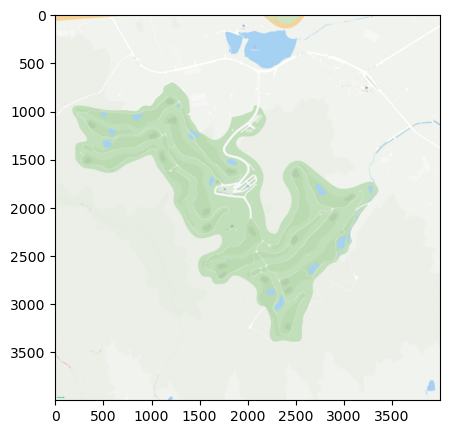

In [203]:
image = cv2.medianBlur(image_org,15)

fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(image)

In [204]:
## Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

## Mask of green (36,25,25) ~ (86, 255,255)
# mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
# 65,  41, 223
#  67,  48, 218
#  68,  38, 206]
# mask = cv2.inRange(hsv, (57, 38, 73), (80, 55,217)) # green
mask = cv2.inRange(hsv, (57, 35, 70), (80, 55,219))
# mask = cv2.inRange(hsv, (24, 29, 217), (76, 77,221))
# (hMin = 65 , sMin = 34, vMin = 126), (hMax = 69 , sMax = 90, vMax = 227)
# (hMin = 64 , sMin = 30, vMin = 191), (hMax = 71 , sMax = 49, vMax = 233)
# mask = cv2.inRange(hsv, (65,30,151), (68, 101,255))
# (hMin = 43 , sMin = 41, vMin = 98), (hMax = 71 , sMax = 115, vMax = 218) for 거창
# mask = cv2.inRange(hsv, (63,41,151), (68, 51,255))
image2 = cv2.bitwise_and(image, image, mask = mask)

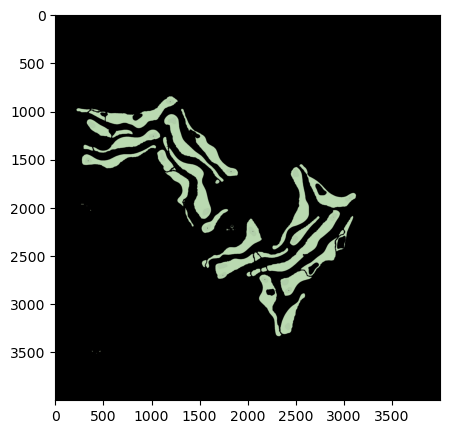

In [205]:
plt.figure(figsize=(5,5))
plt.imshow(image2)
plt.axis('on')
plt.show()

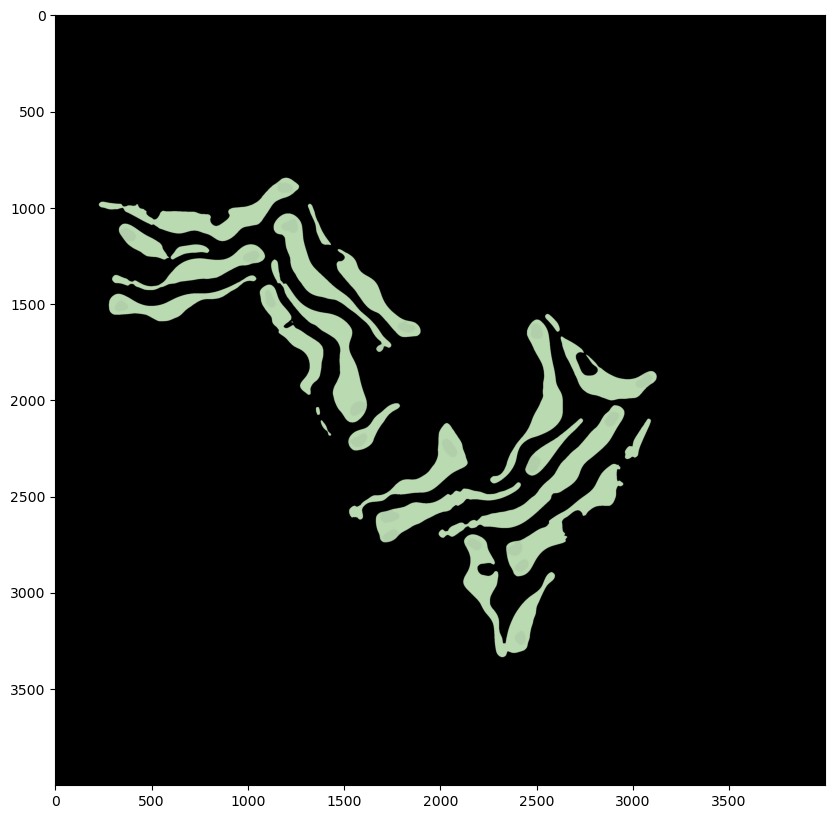

In [206]:
im1_blurred = cv2.medianBlur(image2 ,31)

fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(im1_blurred)

In [207]:
import numpy as np 

pixel_values = im1_blurred.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(im1_blurred.shape)

mask = labels.reshape(im1_blurred.shape[:2]).astype(np.uint8)

if np.where(centers == [0,0,0])[0][0] == 1:
  mask = np.logical_not(mask).astype(np.uint8)

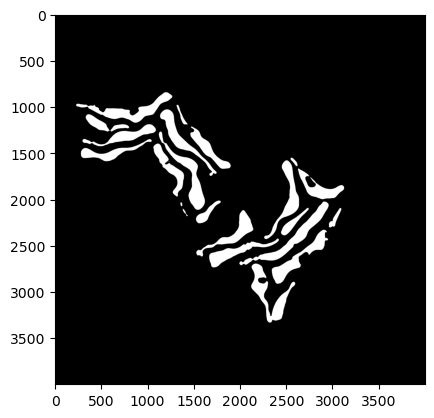

In [208]:
plt.imshow(mask, cmap = 'gray')

In [209]:
contours, hierarchy = cv2.findContours(image=mask.astype(np.uint8), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

In [210]:
len(contours)

24

In [211]:
approx_contours = []

for c in contours:
    epsilon = 0.002*cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,epsilon,True)
    
    if cv2.contourArea(c) > 5000:
        approx_contours.append(approx)
    print(c.shape,approx.shape)

(2388, 1, 2) (47, 1, 2)
(1625, 1, 2) (37, 1, 2)
(1728, 1, 2) (44, 1, 2)
(1592, 1, 2) (35, 1, 2)
(172, 1, 2) (63, 1, 2)
(488, 1, 2) (28, 1, 2)
(695, 1, 2) (19, 1, 2)
(96, 1, 2) (38, 1, 2)
(2169, 1, 2) (39, 1, 2)
(655, 1, 2) (27, 1, 2)
(1492, 1, 2) (35, 1, 2)
(17, 1, 2) (8, 1, 2)
(1869, 1, 2) (28, 1, 2)
(202, 1, 2) (41, 1, 2)
(1336, 1, 2) (38, 1, 2)
(1594, 1, 2) (30, 1, 2)
(1949, 1, 2) (34, 1, 2)
(1168, 1, 2) (32, 1, 2)
(424, 1, 2) (25, 1, 2)
(1639, 1, 2) (35, 1, 2)
(589, 1, 2) (27, 1, 2)
(1747, 1, 2) (35, 1, 2)
(470, 1, 2) (21, 1, 2)
(2259, 1, 2) (39, 1, 2)


In [212]:
len(approx_contours)

20

In [213]:
image_copy = image_org.copy()
# c = max(contours, key = cv2.contourArea)
image_copy = cv2.drawContours(image=image_copy, contours=approx_contours, contourIdx=-1, color=(255,1,1), thickness=2, lineType=cv2.LINE_AA)

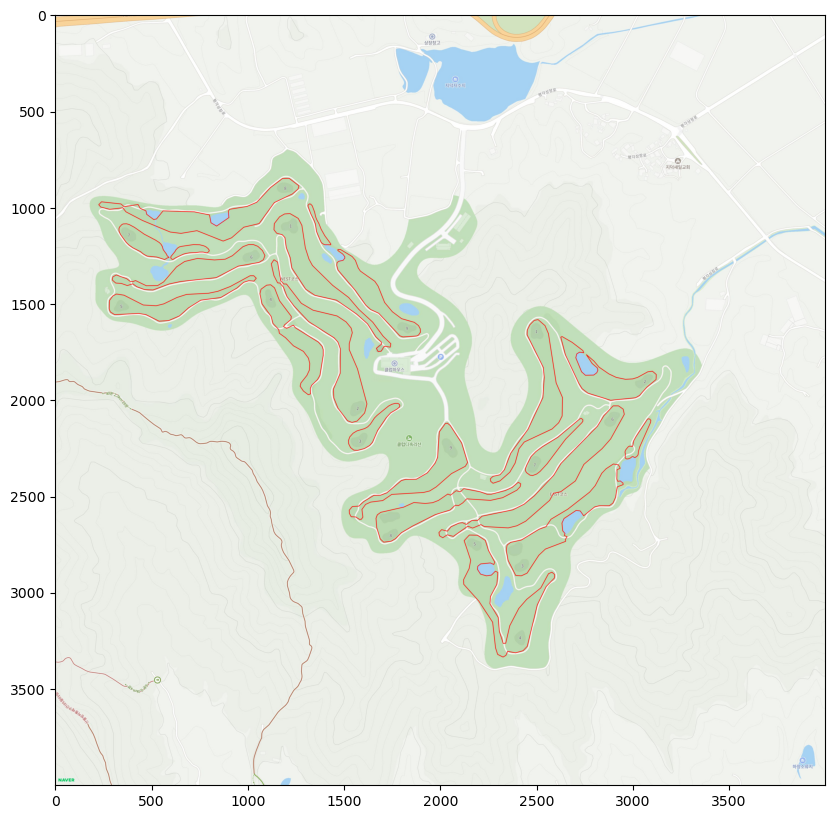

In [214]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(image_copy)

In [215]:
contours = approx_contours

def convert_latlon(a,dataset_):
    return dataset_.xy(a[1],a[0])

In [216]:
from shapely.geometry import Polygon


con_geo = []
for i,contour in enumerate(contours):
    con_single = np.squeeze(np.apply_along_axis(lambda p: convert_latlon(p, dataset), -1, contour))
    
    try:
        con_single = Polygon(con_single)
        con_geo.append(con_single)
    except:
        pass

In [217]:
gdf = gpd.GeoSeries(con_geo, crs=int(4326))
gdf = gpd.GeoDataFrame(geometry=gdf)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [218]:
gdf['Name']= 'Contour_' + gdf.index.astype(str)
gdf['Client'] = os.path.split(out_tiff)[-1].split('L')[0]

gdf['Course'] = 'TBD'
gdf['Hole'] = gdf.index.astype(str)

gdf['Type'] = '홀영역'
gdf['Valid'] = True




In [219]:
gdf

,geometry,Name,Client,Course,Hole,Type,Valid
0,"POLYGON ((127.78417 36.44332, 127.78403 36.443...",Contour_0,클럽디속리산CC,TBD,0,홀영역,True
1,"POLYGON ((127.78560 36.44447, 127.78553 36.444...",Contour_1,클럽디속리산CC,TBD,1,홀영역,True
2,"POLYGON ((127.78832 36.44490, 127.78818 36.444...",Contour_2,클럽디속리산CC,TBD,2,홀영역,True
3,"POLYGON ((127.78364 36.44578, 127.78356 36.445...",Contour_3,클럽디속리산CC,TBD,3,홀영역,True
4,"POLYGON ((127.78920 36.44592, 127.78915 36.445...",Contour_4,클럽디속리산CC,TBD,4,홀영역,True
5,"POLYGON ((127.78733 36.44591, 127.78729 36.445...",Contour_5,클럽디속리산CC,TBD,5,홀영역,True
6,"POLYGON ((127.78846 36.44615, 127.78833 36.446...",Contour_6,클럽디속리산CC,TBD,6,홀영역,True
7,"POLYGON ((127.78222 36.44625, 127.78218 36.446...",Contour_7,클럽디속리산CC,TBD,7,홀영역,True
8,"POLYGON ((127.78672 36.44776, 127.78685 36.447...",Contour_8,클럽디속리산CC,TBD,8,홀영역,True
9,"POLYGON ((127.78609 36.44815, 127.78598 36.448...",Contour_9,클럽디속리산CC,TBD,9,홀영역,True


In [220]:
import fiona
with fiona.Env(OSR_WKT_FORMAT="WKT2_2018"):
  gdf.to_file(os.path.join(json_folder,os.path.split(out_tiff)[-1].split('L')[0]+'_홀영역_'+'.geojson'), driver='GeoJSON')